In [1]:
#import main libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible

from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#import data to dataframe
df = pd.read_csv("datasets/BankChurners.csv")
#drop last 2 columns as not required
df.drop(labels={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'},axis=1,inplace = True)
df.shape#(10127, 21)

(10127, 21)

In [3]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [4]:
df.info()
#missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
df_copy=df.copy()
#create numerical target var
df['Attrition_Flag']=df_copy['Attrition_Flag'].apply(lambda x: 0 if x=='Existing Customer' else 1)
df_copy['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [6]:
#create test and train data
from sklearn.model_selection import train_test_split


df_train_data,df_test_data,df_train_target,df_test_target = train_test_split(df_copy.drop('Attrition_Flag',axis=1),df_copy['Attrition_Flag'],test_size=0.3,
                                                                           random_state=42,stratify=df_copy['Attrition_Flag'])
print(df_train_data.shape,' and ',df_test_data.shape)
#(7088, 20)  and  (3039, 20)

(7088, 20)  and  (3039, 20)


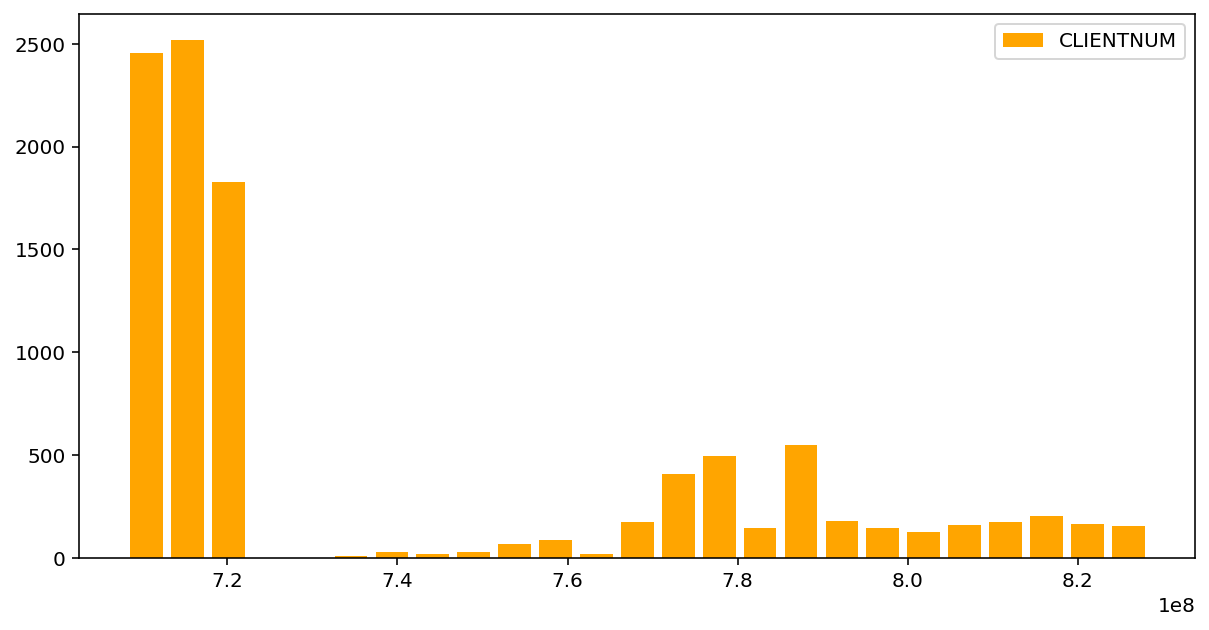

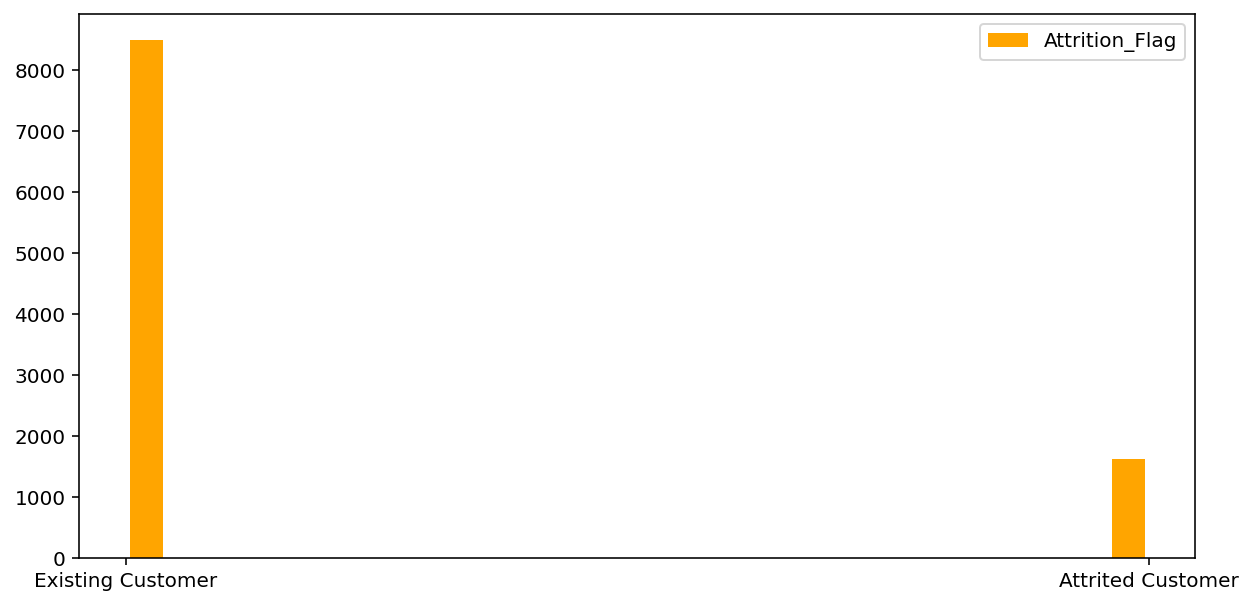

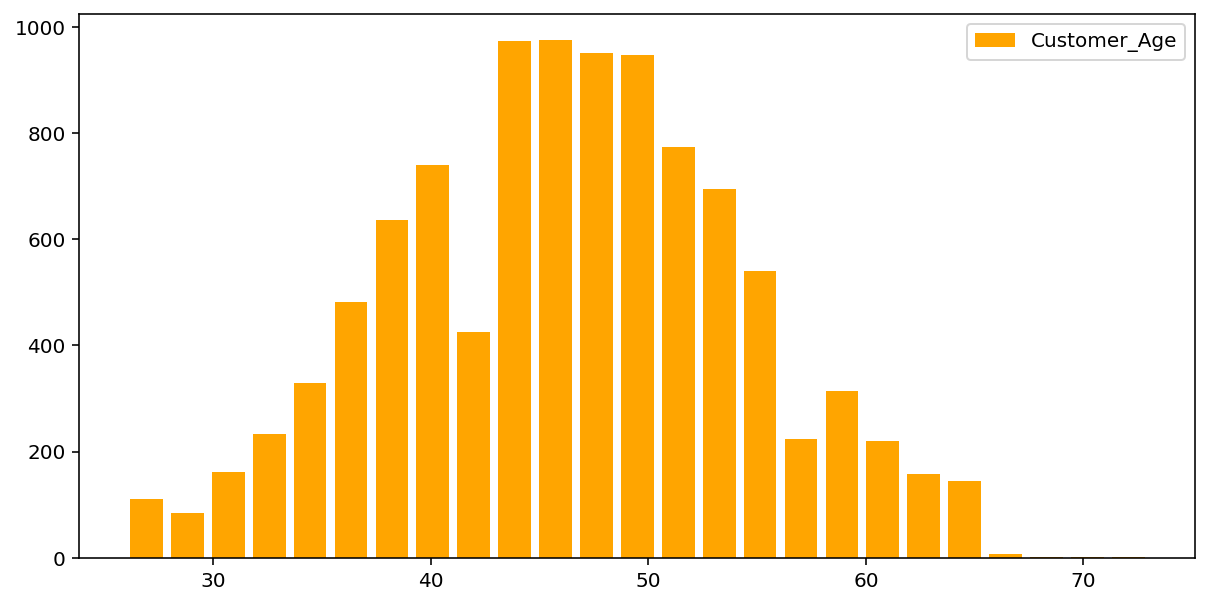

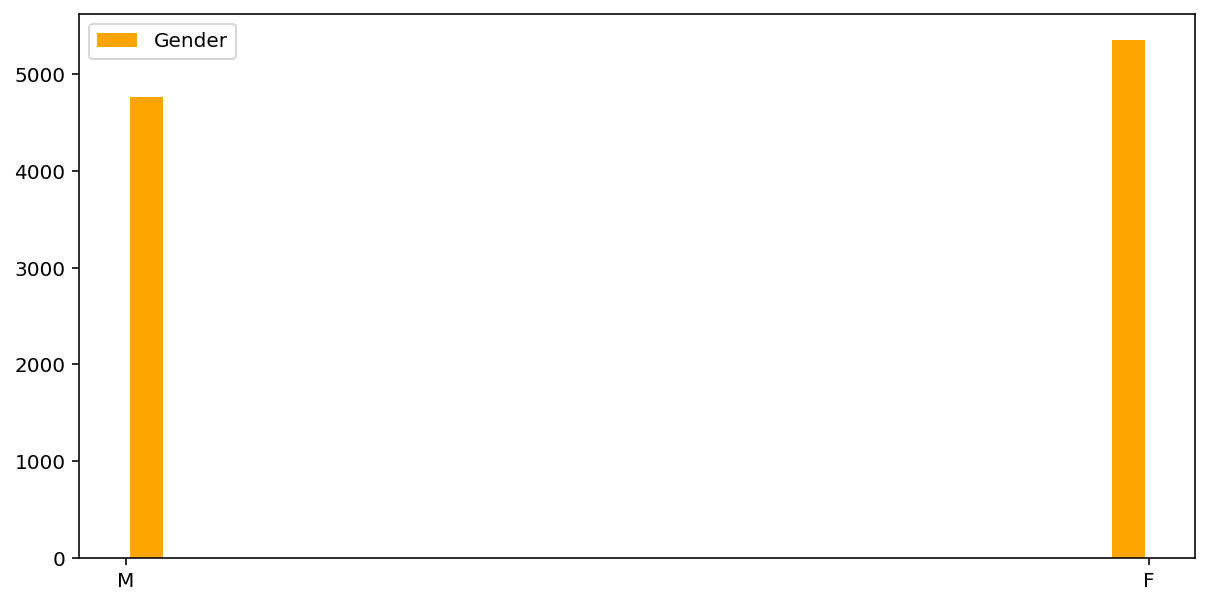

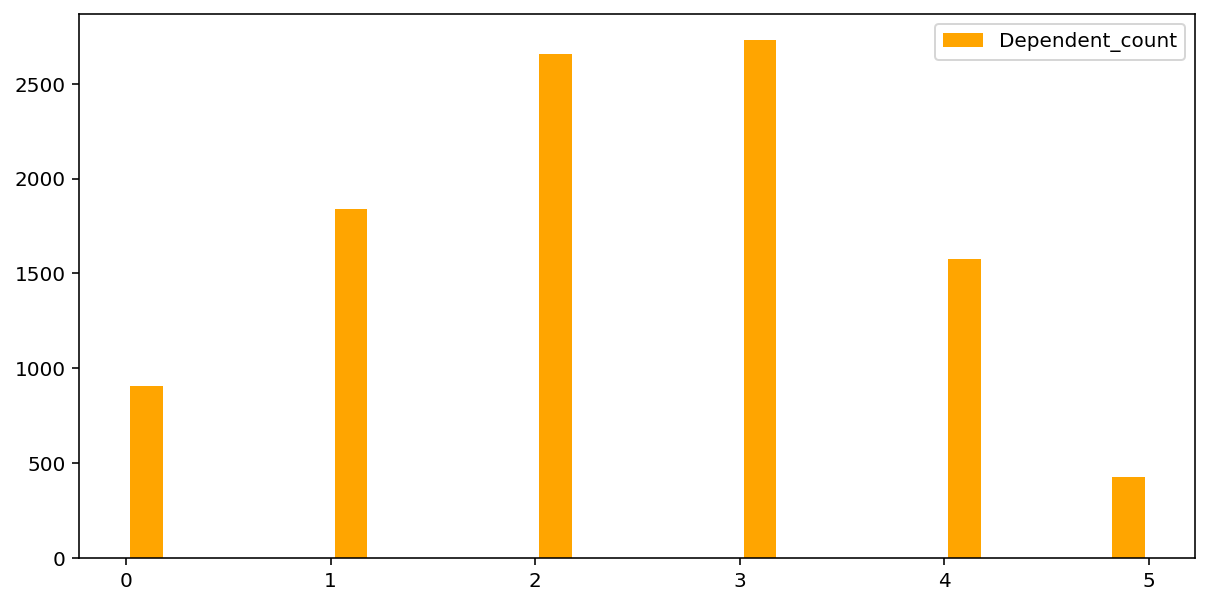

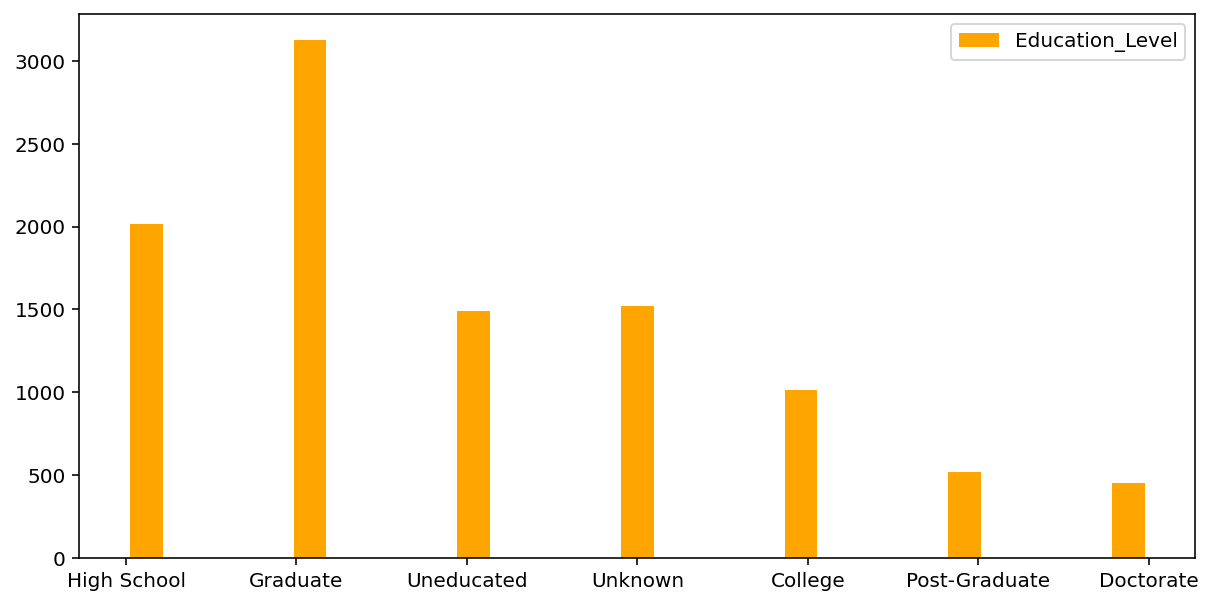

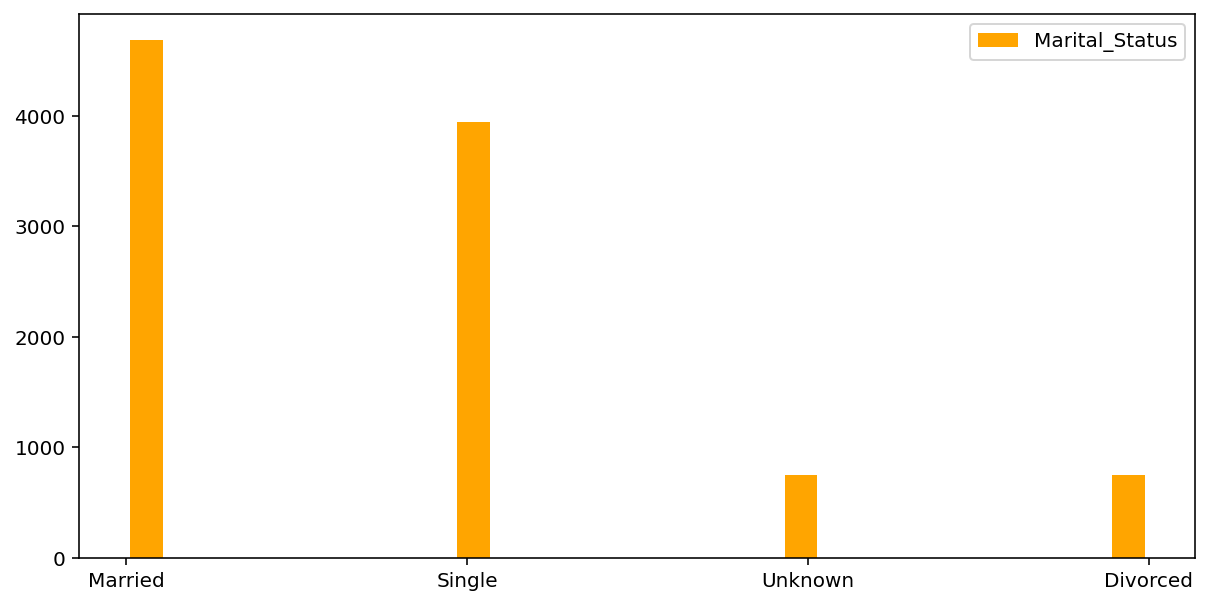

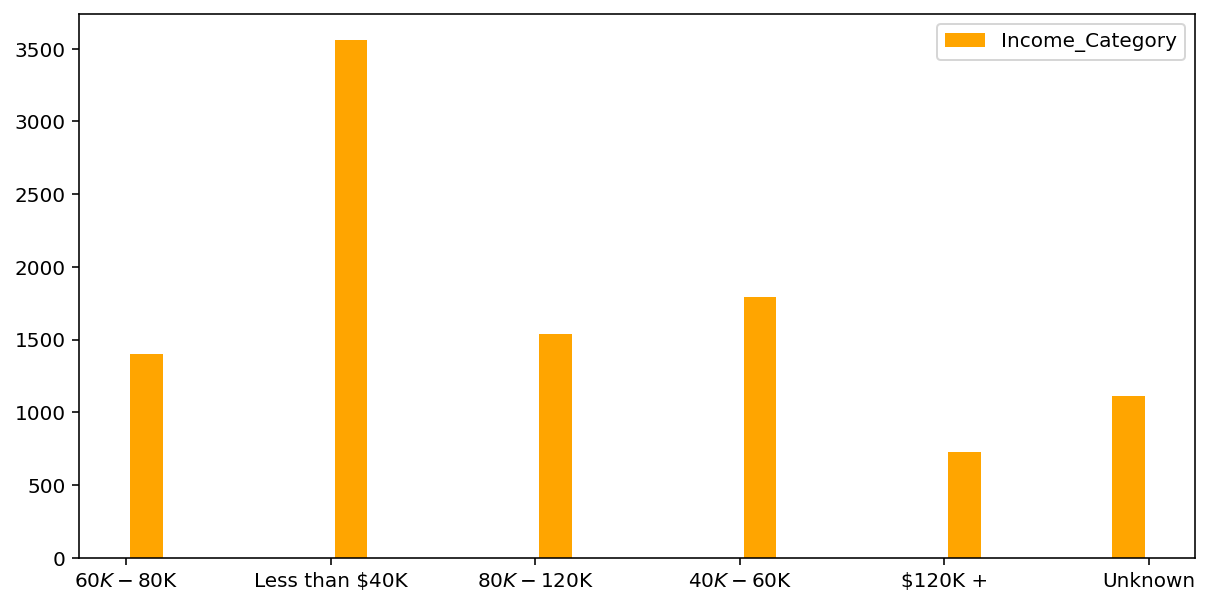

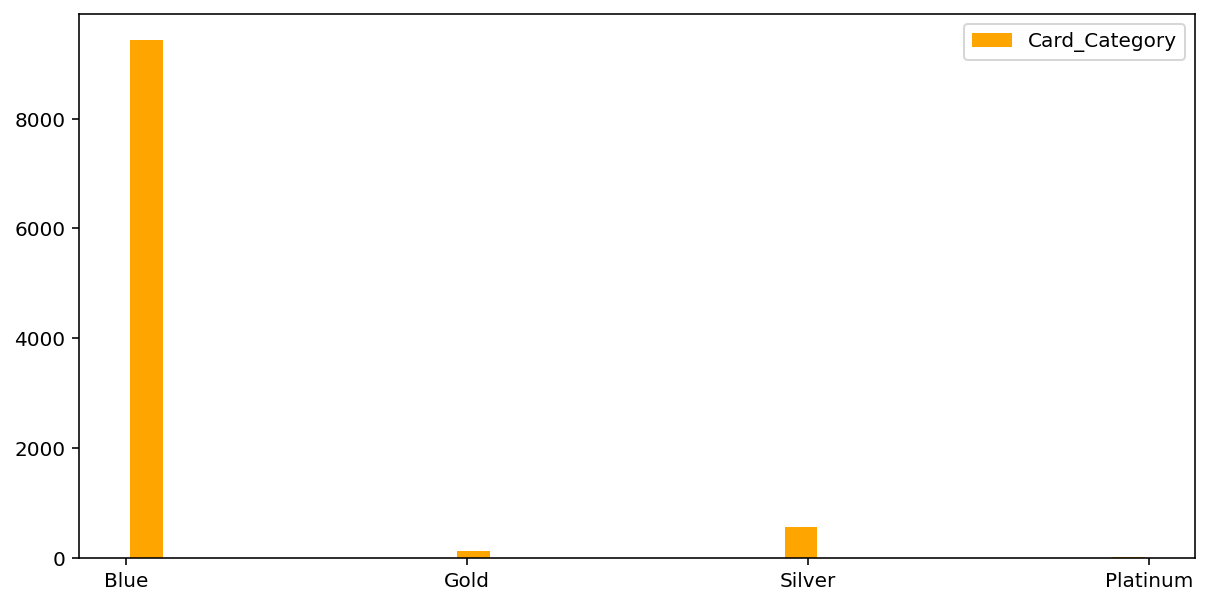

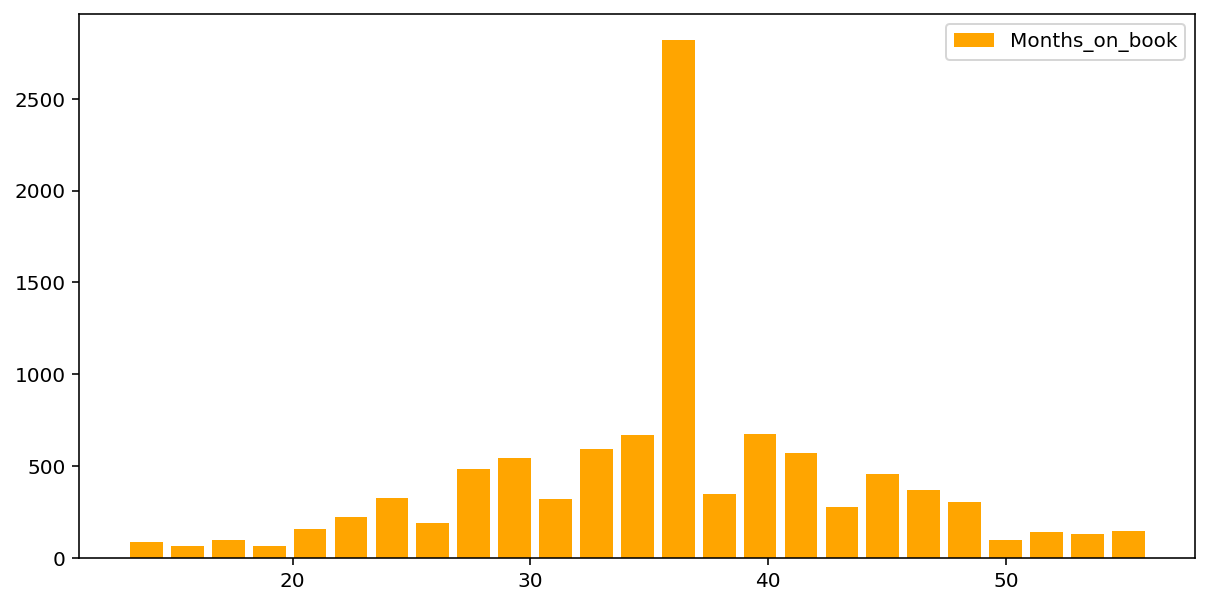

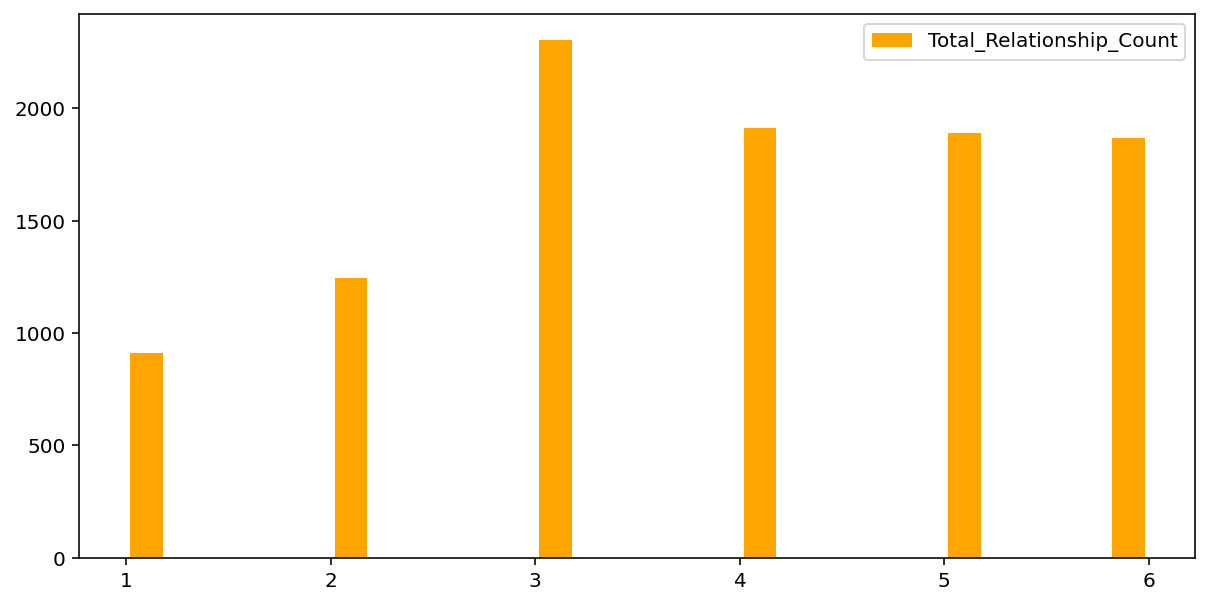

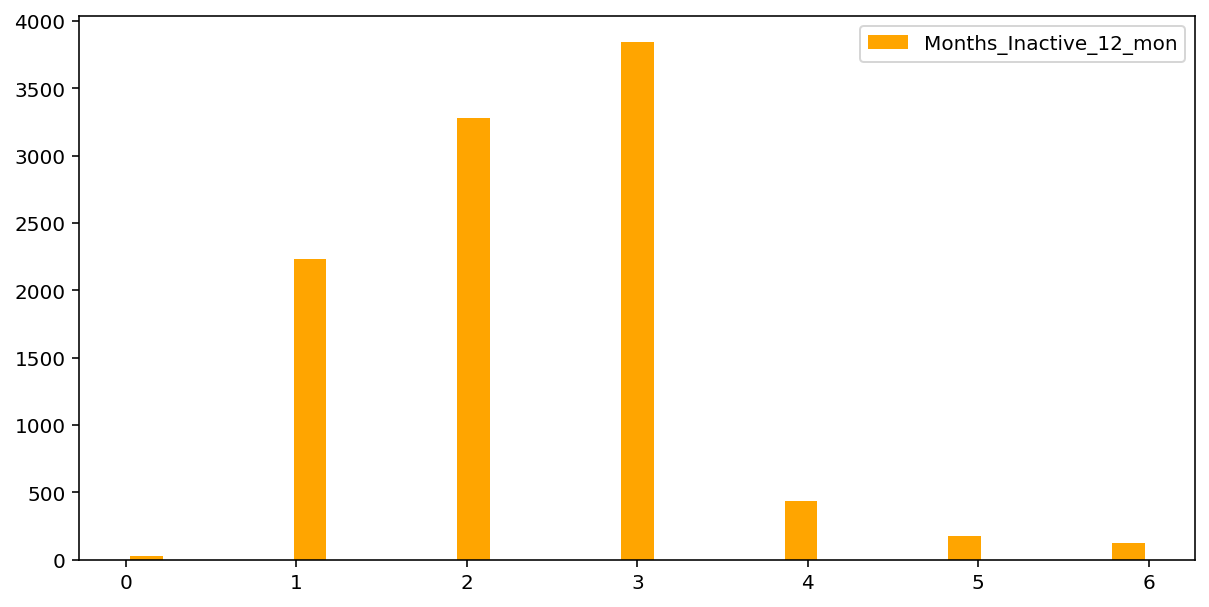

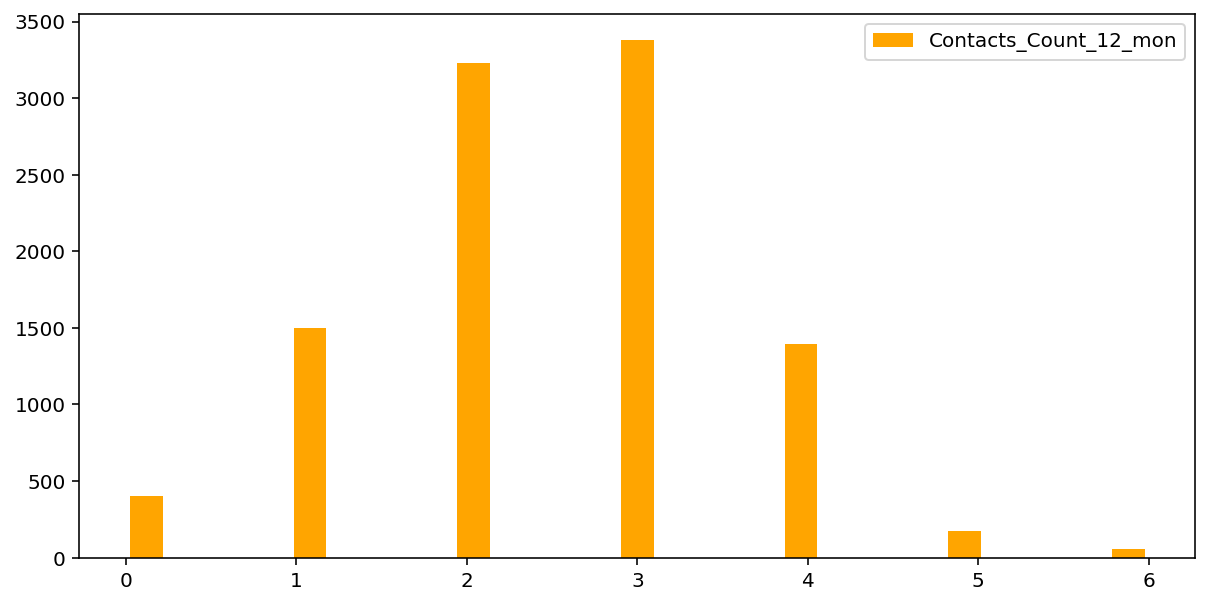

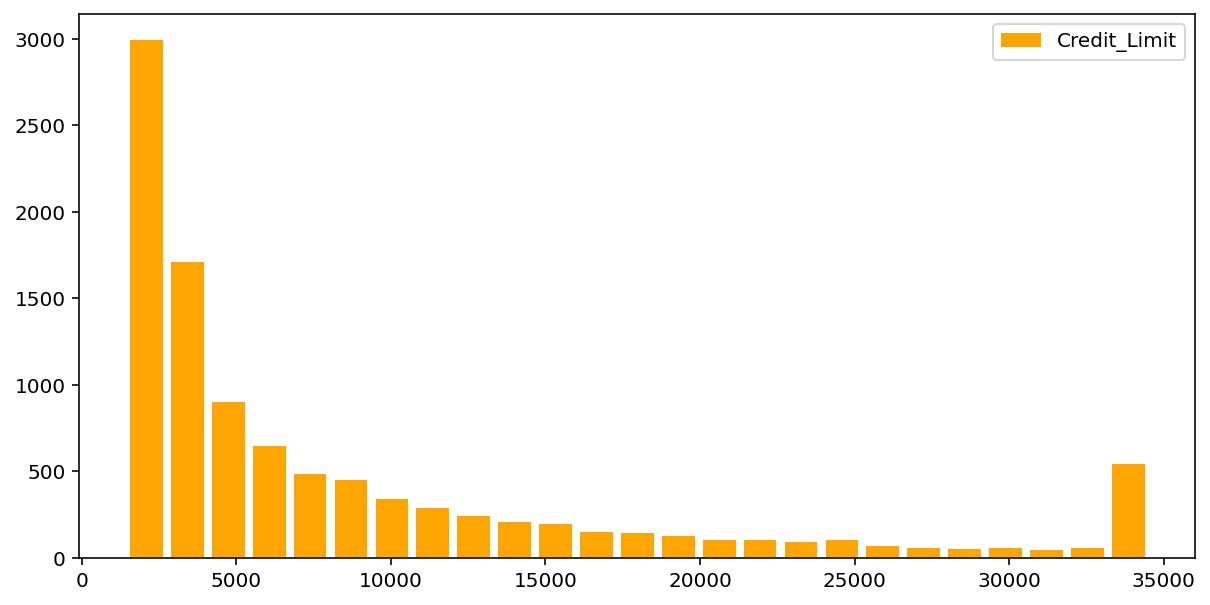

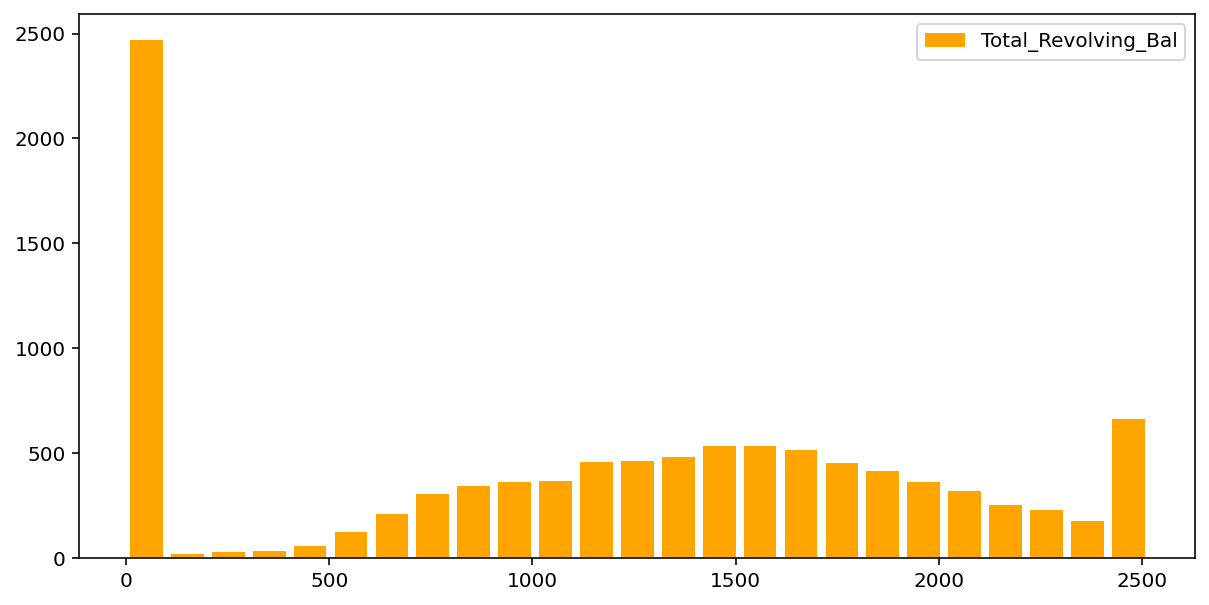

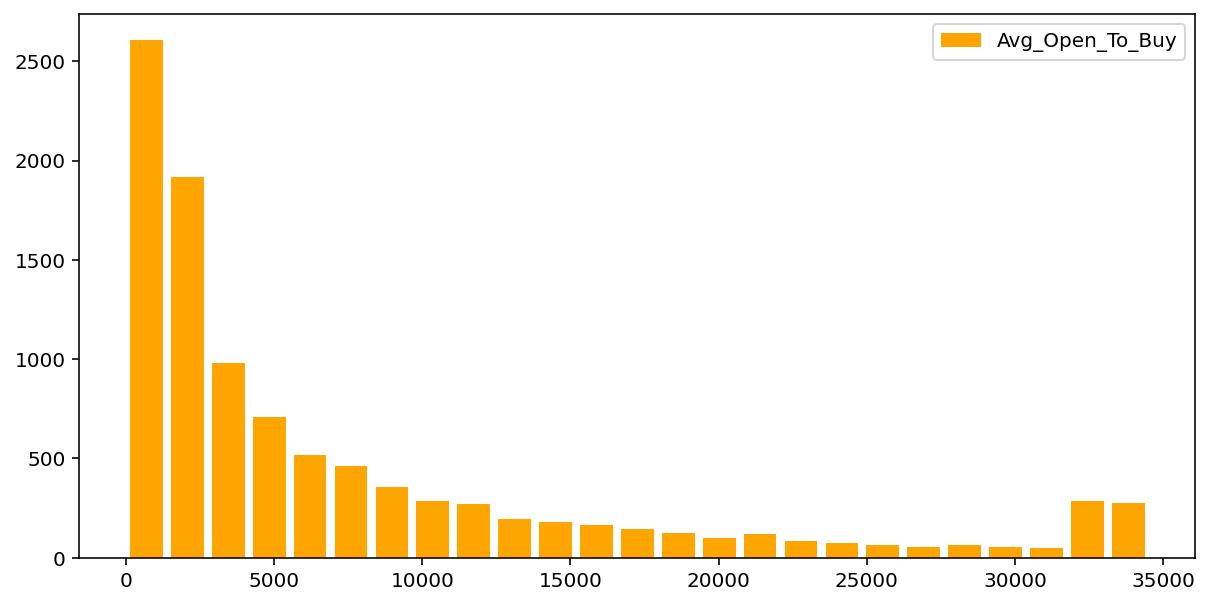

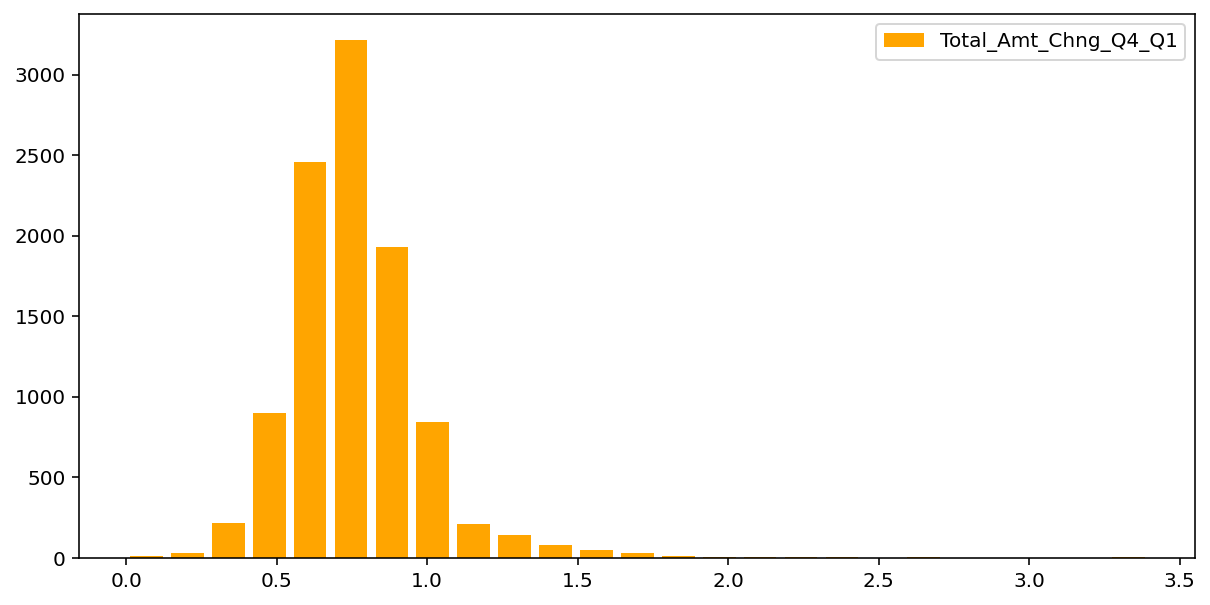

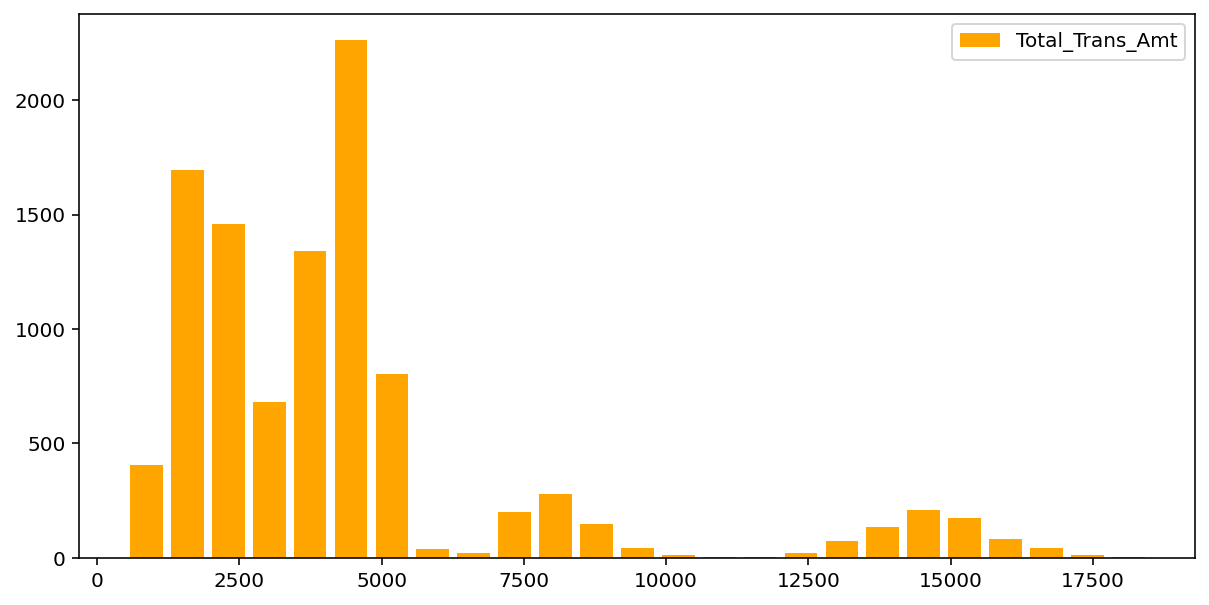

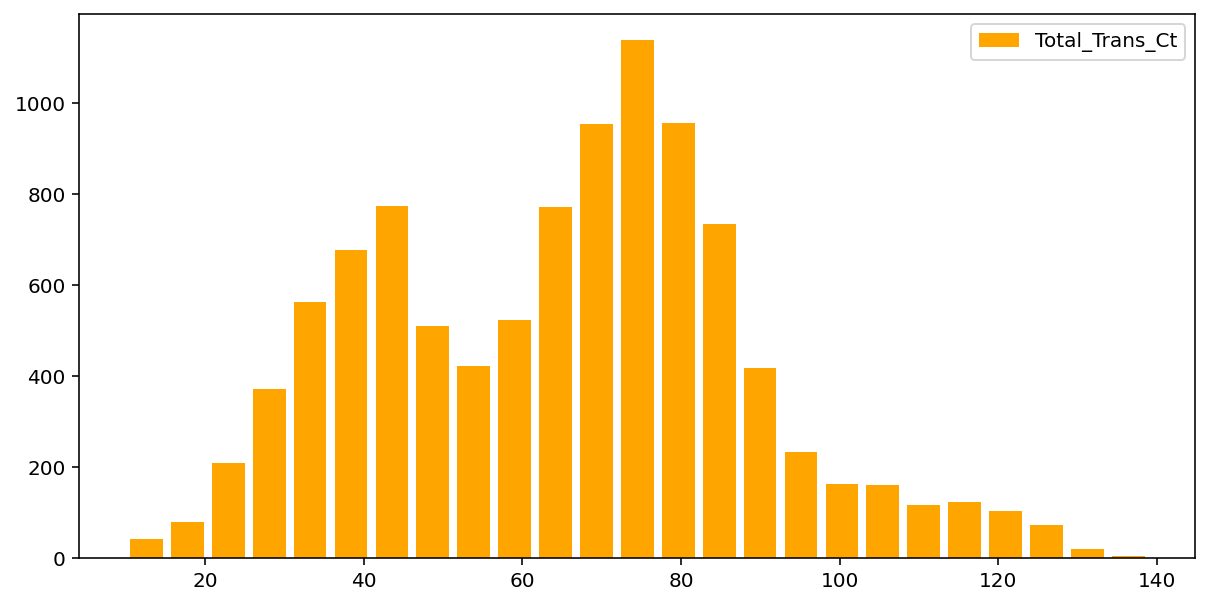

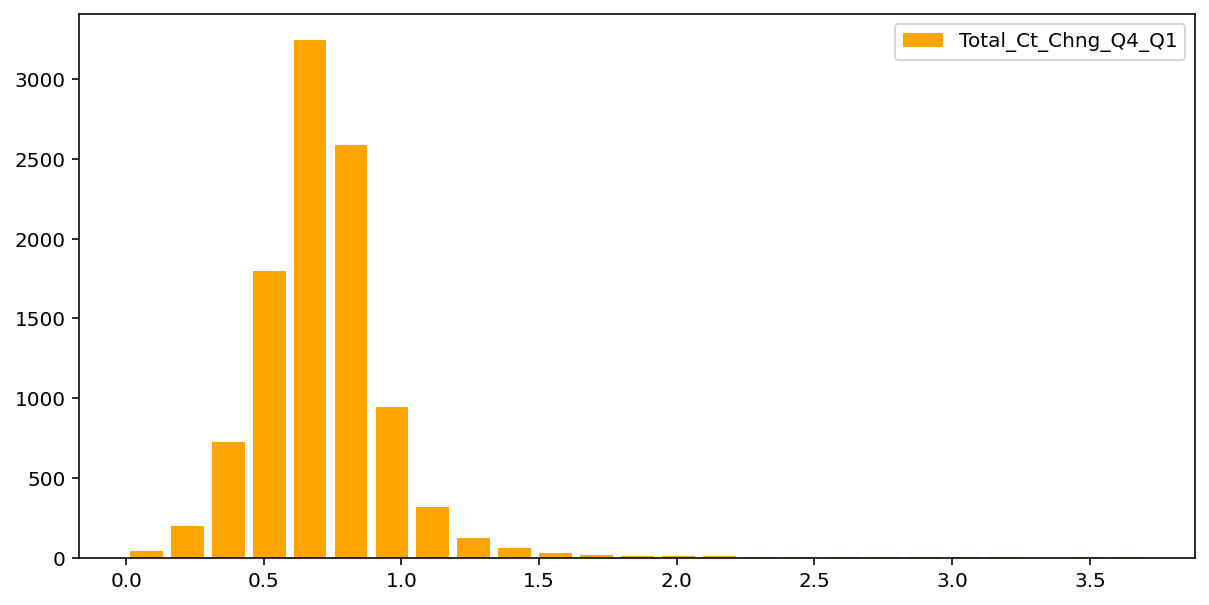

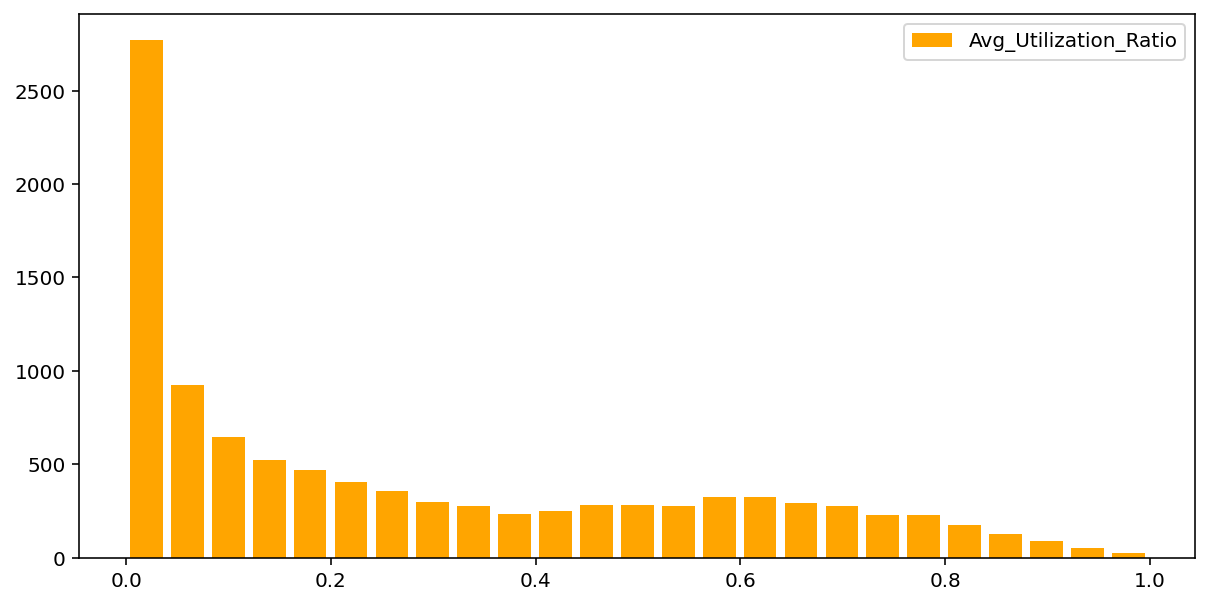

In [7]:
#visualise histogram
for col in df_copy.columns:
    df_copy[col].hist(bins=25, figsize=(10,5),rwidth=0.8,color="orange", legend=True)
    plt.grid(None)
    plt.show()
    

Observations:-
- 1) Data has Imbalanced response(Attrition_Flag) dataset(usually true for all churn models)
- 2) Median age is around 45 (normally distributed)
- 3) Blue is largest card category. Gold/silver and Platinum negligible. In real life scenario, not all customer attrition is equal weight. Platinum customer might be much more profitable and ideally we would like to create separate attrition models for each card type(assuming target customer behavior and demographics are very different)
- 4)MOB most customers look like 30-40 MOB, so approx 3years is avergae customer on book.
- 5) Most customers have been inactive 1-3 mos in last 12 months.Good to make a group (<=3mos inactive and >3mos inactive).
Ideally recency in transaction data is more important factor in identifying attrition. Would be good to know inactivity recency variables like number_inactive_last3mos,num_inactive_lastmon,etc. 
- 6)Most customers have been contacted 1-4 times.
- 7) Most customers have credit limit 0-5k. some customers have a limit >30k with maximum limit capped at about 35k. This could be a company policy or data might be summarised to include all customers with limit>35k to cap at 35k. Also, in real life scenario, credit limit range is dependent on the card type offered.(card offered depends on customer demographics and credit history)
- 8)Total Rev bal:- There is a large group of customers with 0revolving balance. Other customers seem to have revolving bal of 1k-2k, with a another group with rev Balance about $2500. Looks like revolving balances are capped at $2500(all values >2500k assigned 2500). 
In real life scenario all credit card portfolios are divided in transactor-revolver segmentation(with multiple levels of revolver segments based on %rev balances/credit limit, i.e utilization bands. When this data is aggregated at customer level for all credit products and all credits loans, the utilisation ration [%revolving balance(interest payable balance)/credit limit] is a major factor in determinig customer Credit score)
Avg_utilization_ratio:-  As discussed above, it is a derived variable in data (%revolving bal/credit limit). where transactors(people who pay their balances in full) have 0 utilisation and others divided between 0-1 range. Perso with util=1 is using all his credit limit. In real life scenario, banks would offer a Credit_Line_increase (assuming customer pays the balances in time and has good credit score) to customers who are consistelntly at a higher utilisation level.(>0.5)
- 9) Trans_amt_change_Q4/Q1 and Trans_cnt_change_Q4/Q1 are good indicator of recency of transaction. How the rceent behavior differs from past behavior. A recent decrease in transaction or amount of transaction shows decreasing customer engagement and higher chances of attrition. However, a part of this change could also be cyclical in nature and dependent on customer seasonal credit requirement (eg usually in Q4 ,i.e december, credit card utilisation generally ncreases due to holiday spending).So it is better to compare a like vs like change(eg change Q4currrent year/Q4 last year) to avoid the effects of seasonality.
- 10) Total transaction amount:- customers look to be divided in 3 groups:-0-5k,7.5-10k and >12.5k.
- 11) Transaction count:-0-50,50-100,>100 look to be the three groups. But distribution looks more normally distributed than transaction amount. Also tran count and tran amount are likely to be +vely correlated.



In [ ]:


# Identify the ranges and type of variables:-

Target
Attrition_Flag

Ordinal
Education_Level           10127 non-null  object 
Income_Category           10127 non-null  object


Categorical

Total_Relationship_Count  10127 non-null  int64 
Gender                    10127 non-null  object 
Dependent_count           10127 non-null  int64  
Marital_Status            10127 non-null  object 
Card_Category             10127 non-null  object 

Numerical(continuous)
Customer_Age              10127 non-null  int64  
Months_on_book
Credit_Limit
Total_Revolving_Bal       10127 non-null  int64  (revolver/transactor type = no revolvei.e transactors,low, medium, high)
Avg_Open_To_Buy           10127 non-null  float64 (otb=credit limit-Avg balance,expect open to buy to be collinear to credit limit and balance as there is a linear relationship)
Total_Amt_Chng_Q4_Q1      10127 non-null  float64 ((q4Amt-Q1Amt)/Q1Amt gives a measure of engagement/usage of bank)
Total_Trans_Amt           10127 non-null  int64  
Total_Trans_Ct            10127 non-null  int64  
Total_Ct_Chng_Q4_Q1       10127 non-null  float64 ((Q4cnt-Q1cnt)/Q1count similar to above gives a measure of affinity, expect collinear with Amt_change value)
Avg_Utilization_Ratio     10127 non-null  float64  (utilisation=avg bal/credit limit. utilisation is a good proxy of credit worthiness, upto 35% utilisation considered healthy. Used to calculate bureau score along with revolve amount. Expect collinearity with Revolving%(maybe linear ot non-linear) as well as credit limit and Avg Balance(linear relation))
Months_Inactive_12_mon    10127 non-null  int64  (month inactive >3 and <=3)
Contacts_Count_12_mon     10127 non-null  int64  (contact counts>3 and <=3)

textual/non usefule(identify if any textual variables which can be useful to further apply NLP techniques(word2vec,sentiment,etc)
CLIENTNUM



In [8]:
#pie chart for categorical and ordinal
cat_collist=['Attrition_Flag',
'Education_Level',        
'Income_Category',          
'Months_Inactive_12_mon',  
'Contacts_Count_12_mon',     
'Total_Relationship_Count',  
'Gender',                   
'Dependent_count',          
'Marital_Status',            
'Card_Category']

Attrition_Flag :



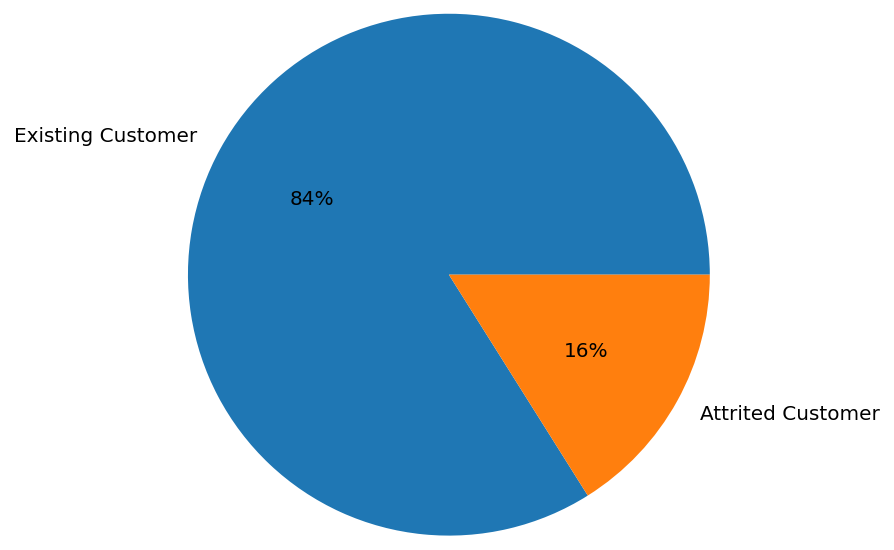

Education_Level :



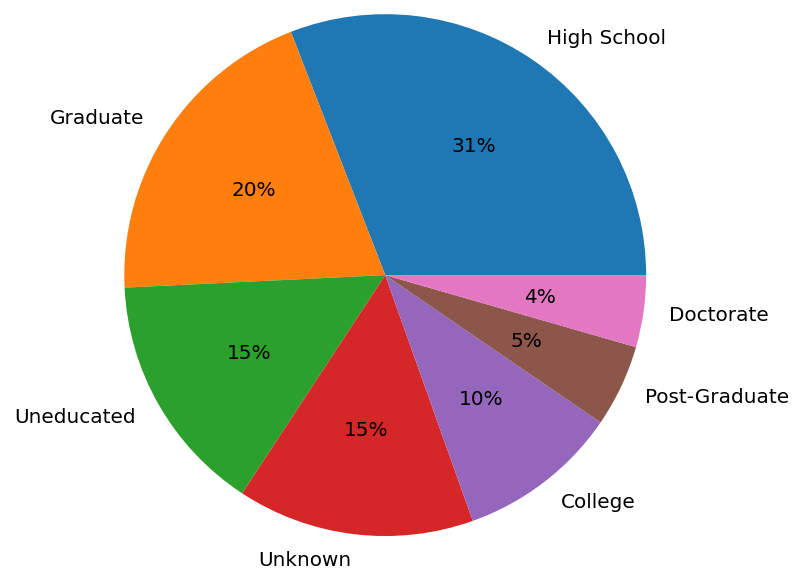

Income_Category :



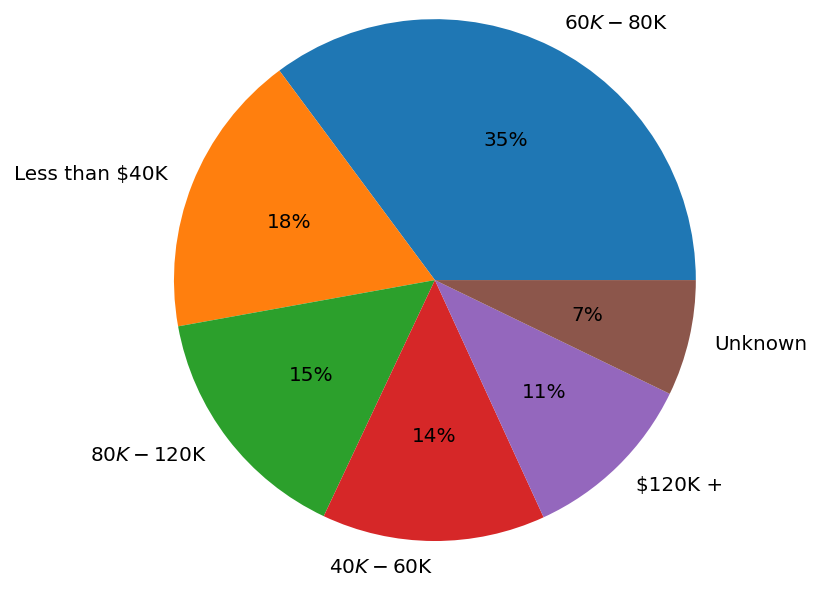

Months_Inactive_12_mon :



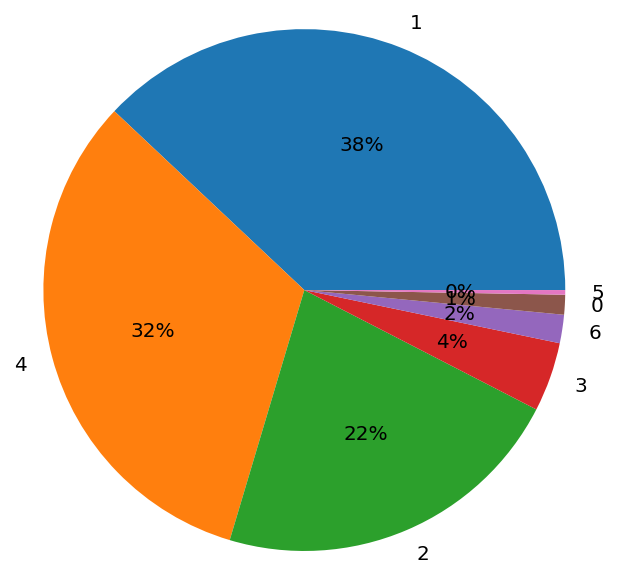

Contacts_Count_12_mon :



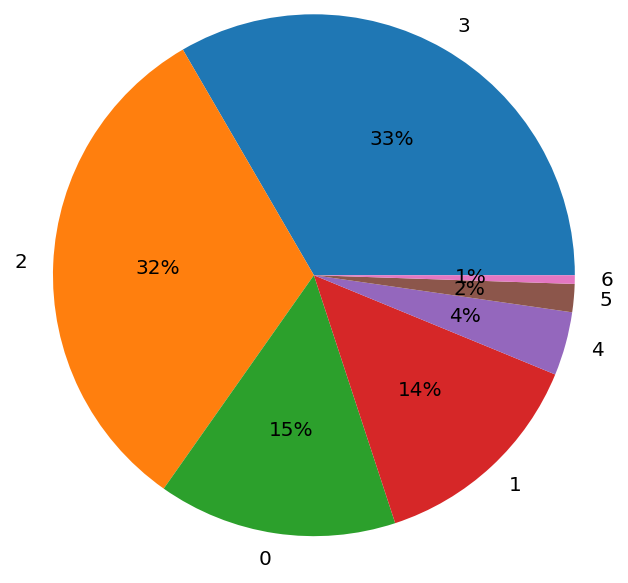

Total_Relationship_Count :



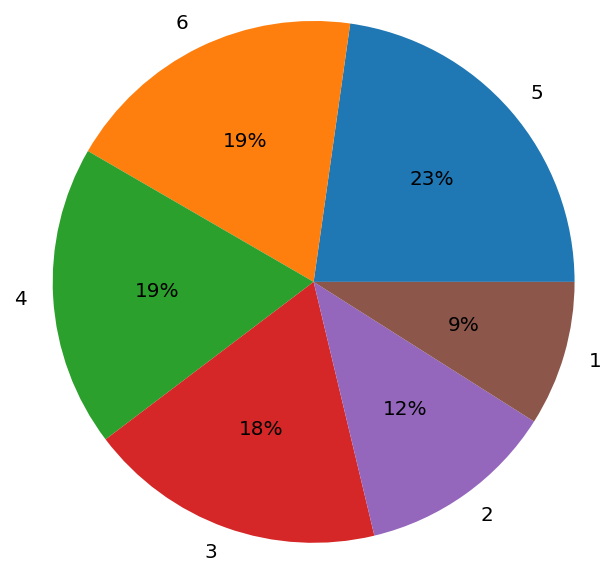

Gender :



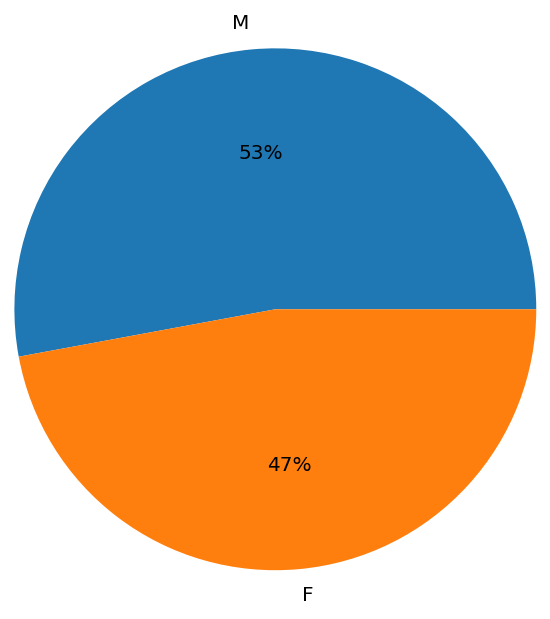

Dependent_count :



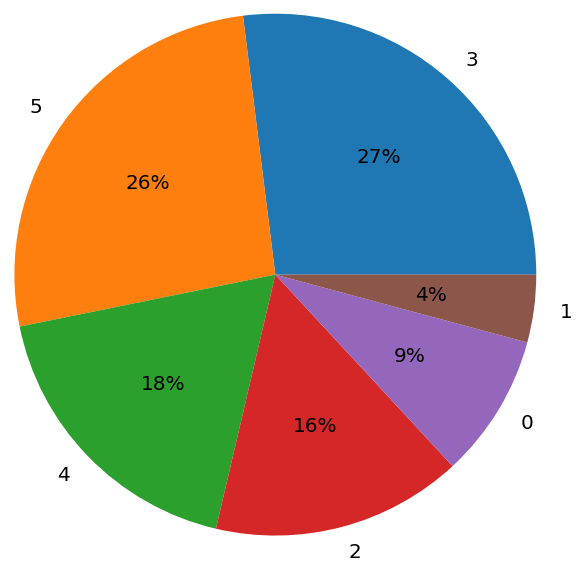

Marital_Status :



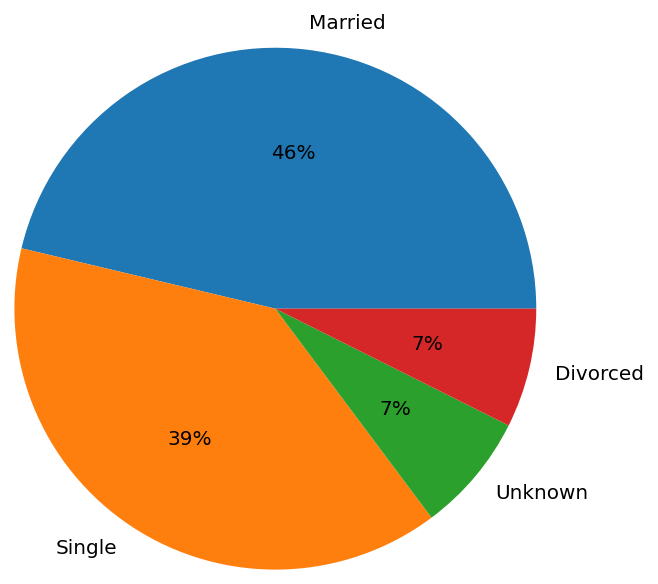

Card_Category :



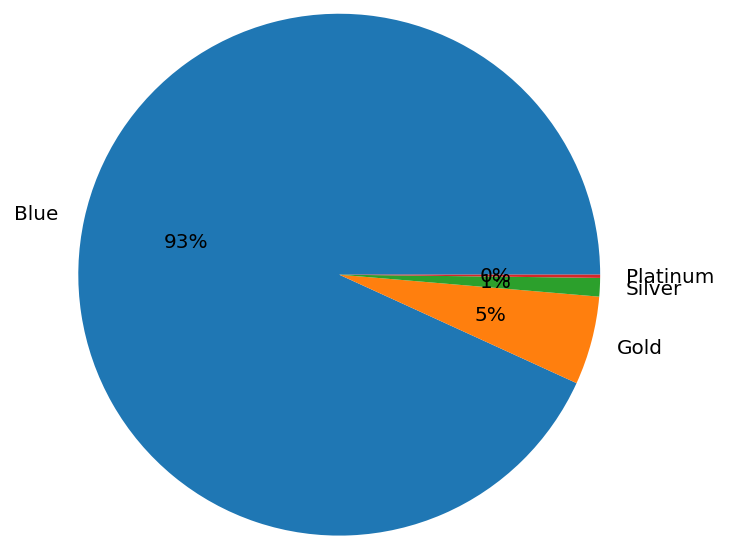

In [9]:
for col in cat_collist:
    print(col,":\n")
    
    plt.pie(df_copy[col].value_counts(),labels=df_copy[col].unique(),
    explode=None,
    colors=None,
    autopct='%0.0f%%',radius=1.5)
    plt.show()

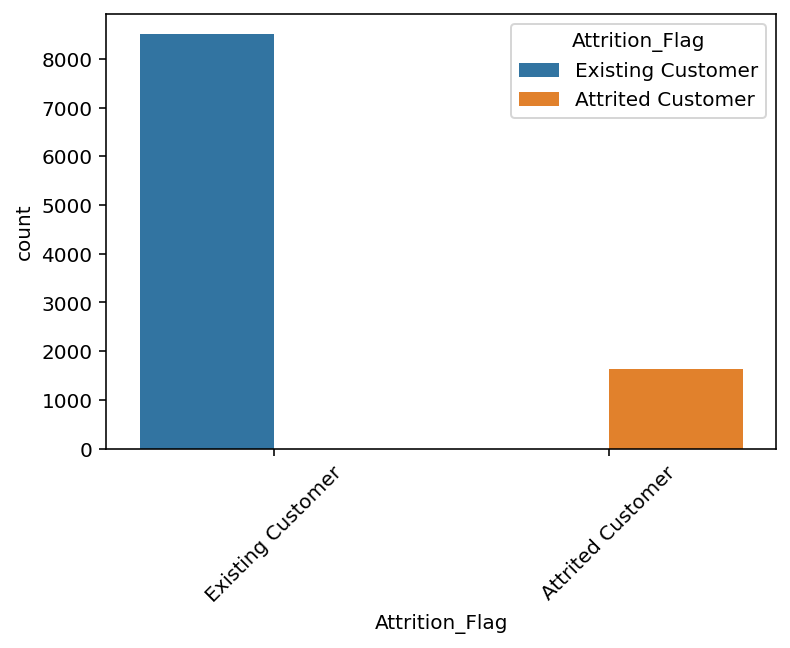

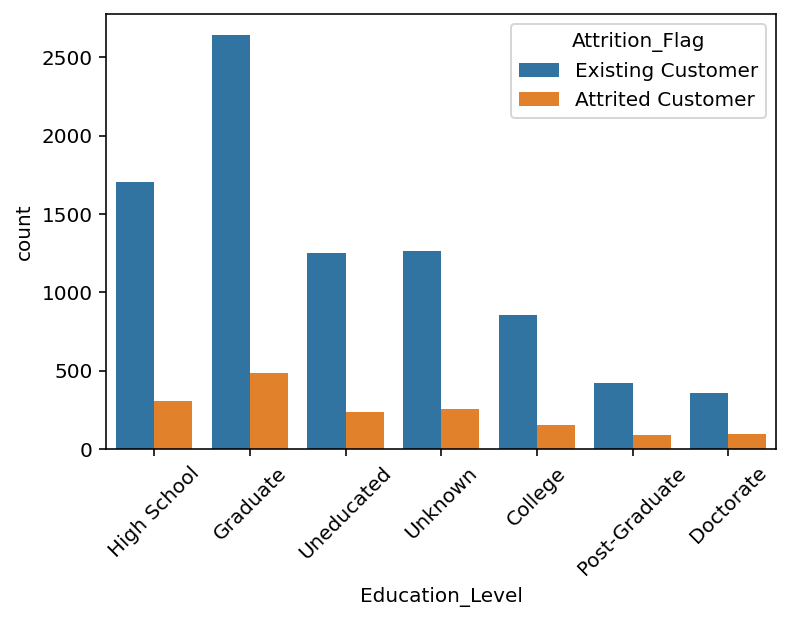

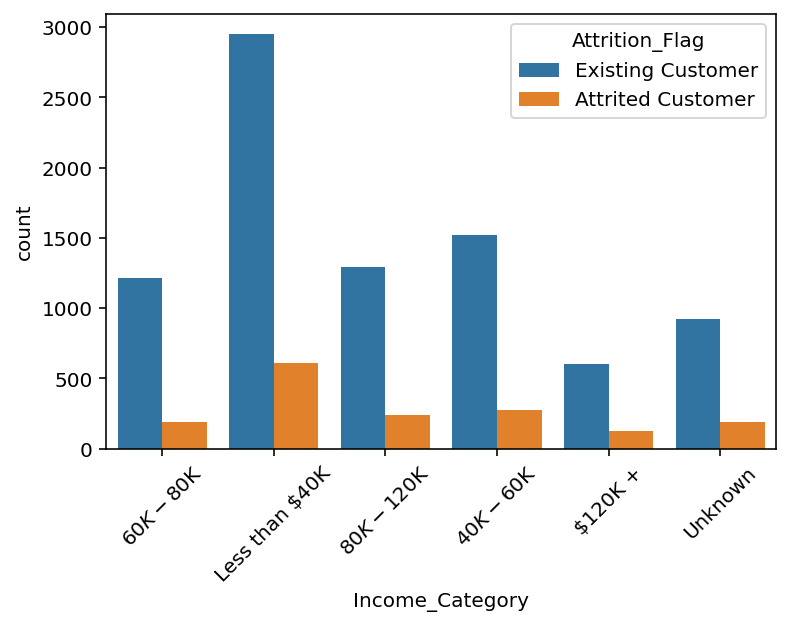

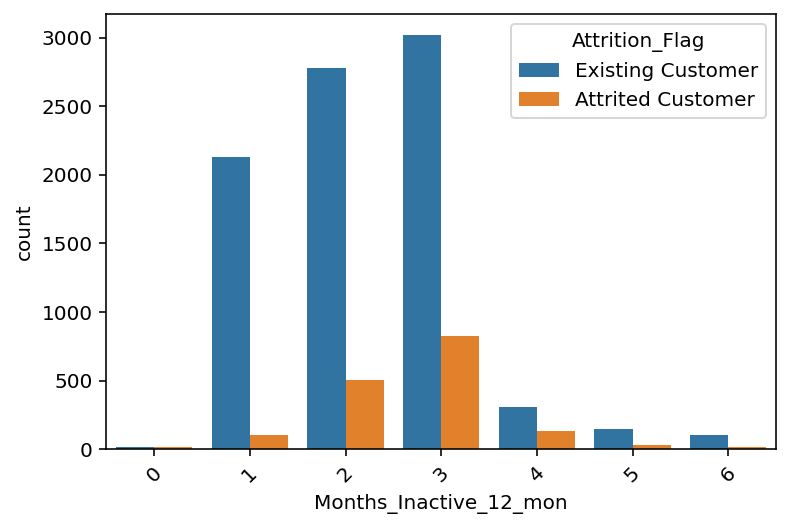

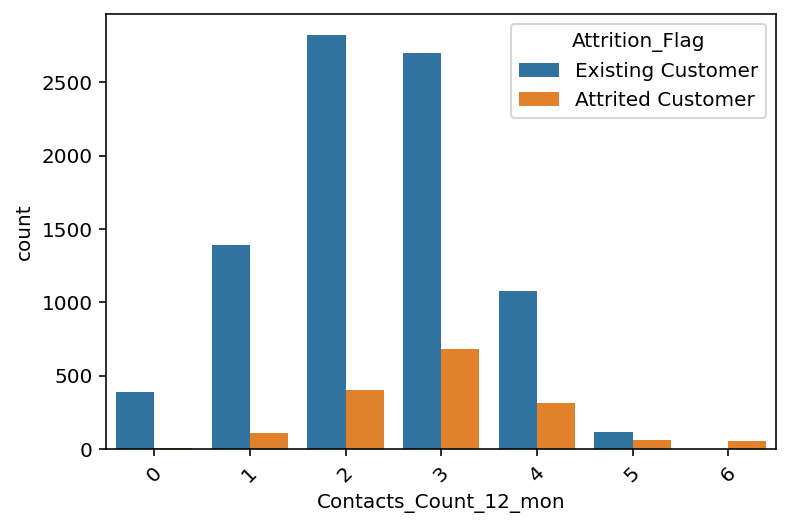

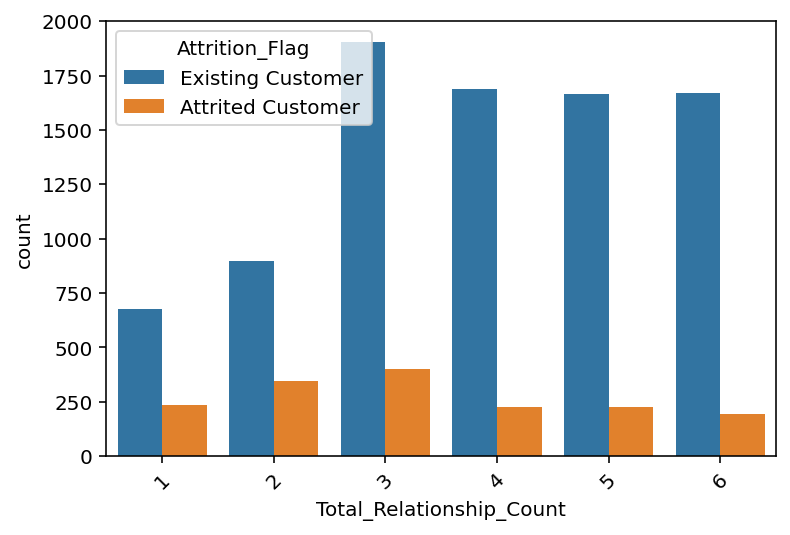

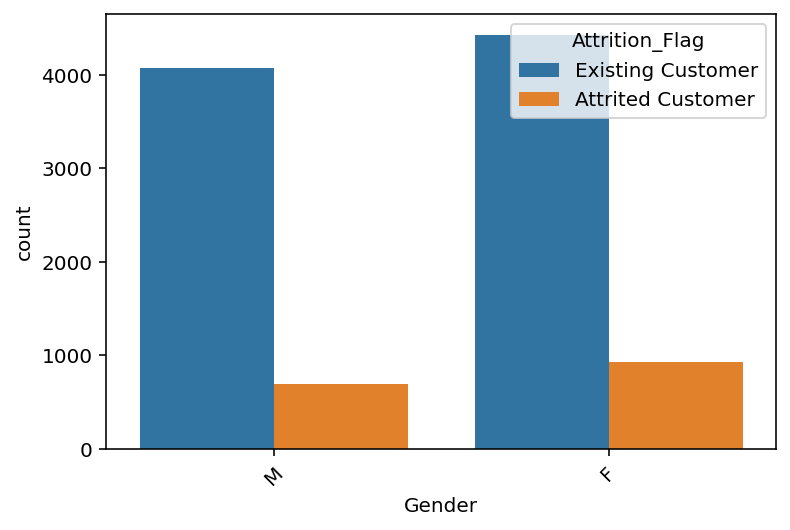

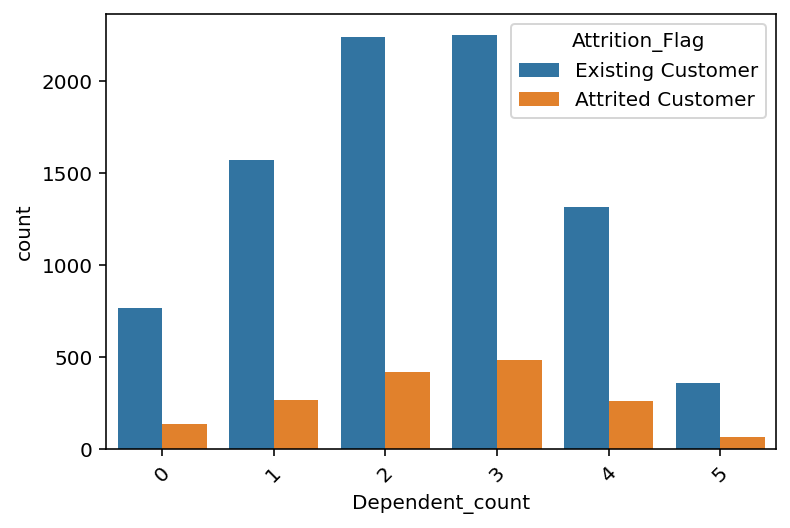

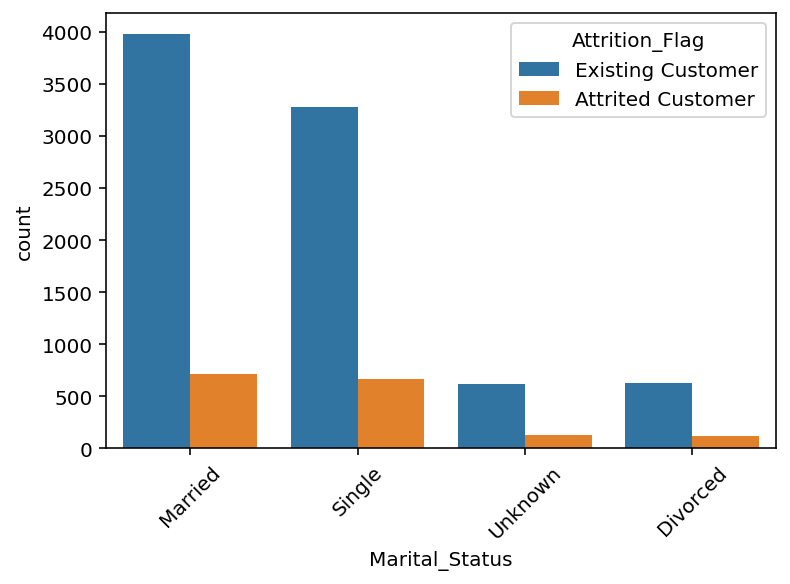

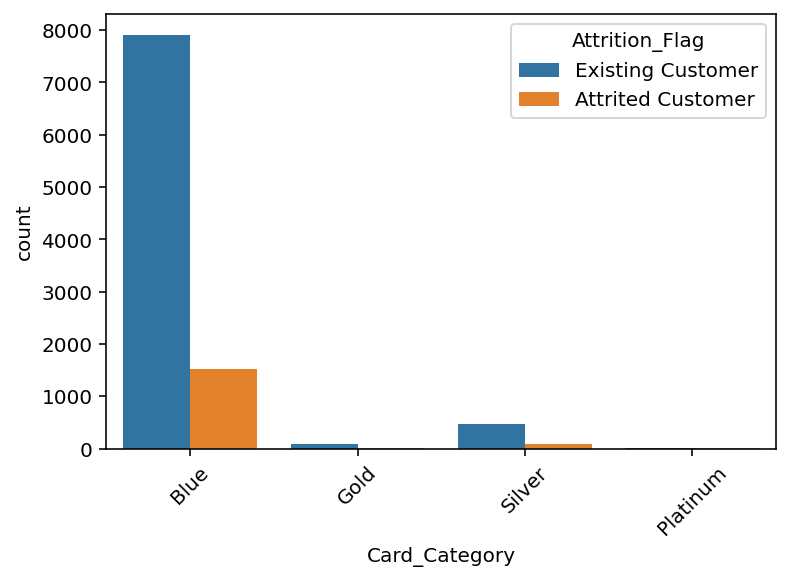

In [10]:
#bivariate analysis Wrt attrition flag to identify important variables
#using SNS countplot to visualize categorical/ordinal data relationship with attrition

for col in cat_collist:
    chart = sns.countplot(x=col, hue="Attrition_Flag", data=df_copy);
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

    plt.show()


# Most differentiating Categorical Variables
- months inactive>3
- Contacts_Count_12_mon>3
- Total_Relationship_Count<3



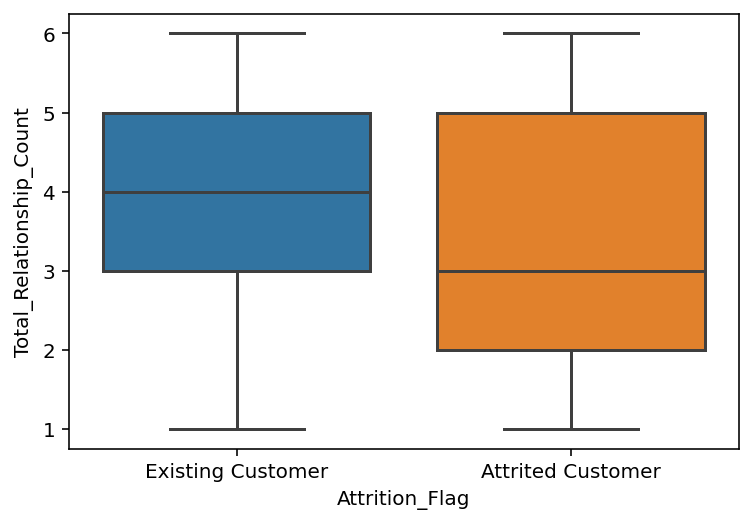

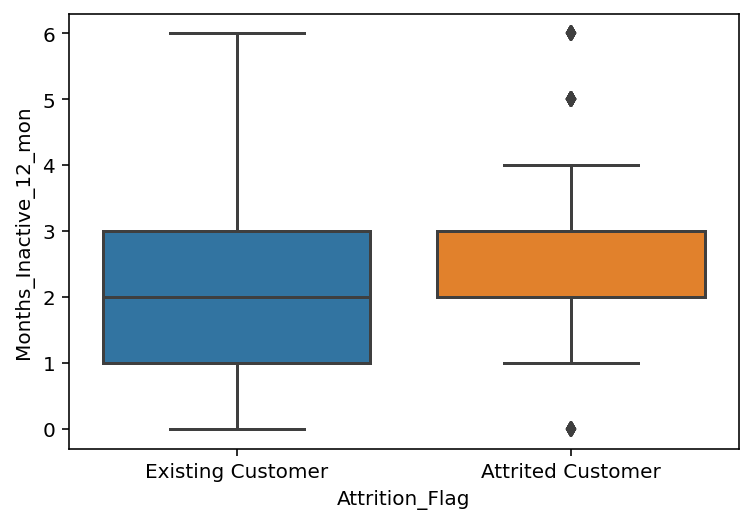

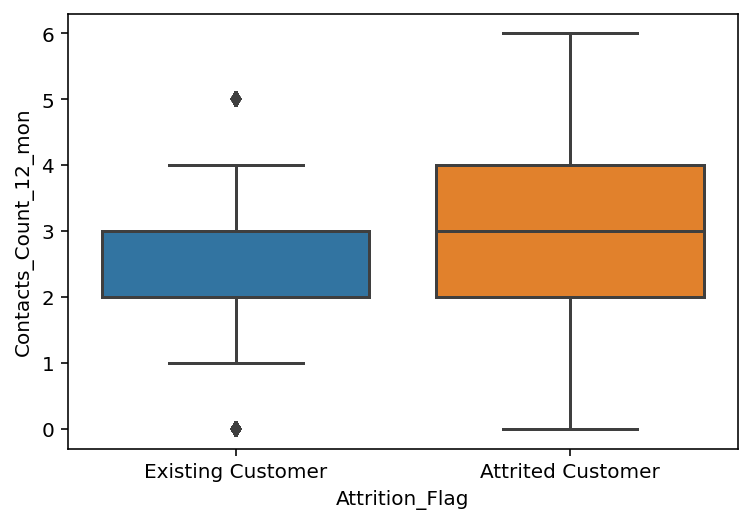

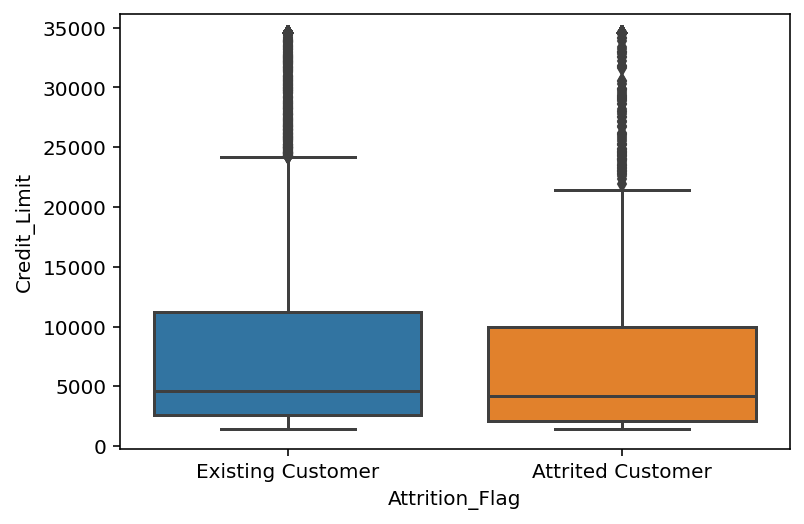

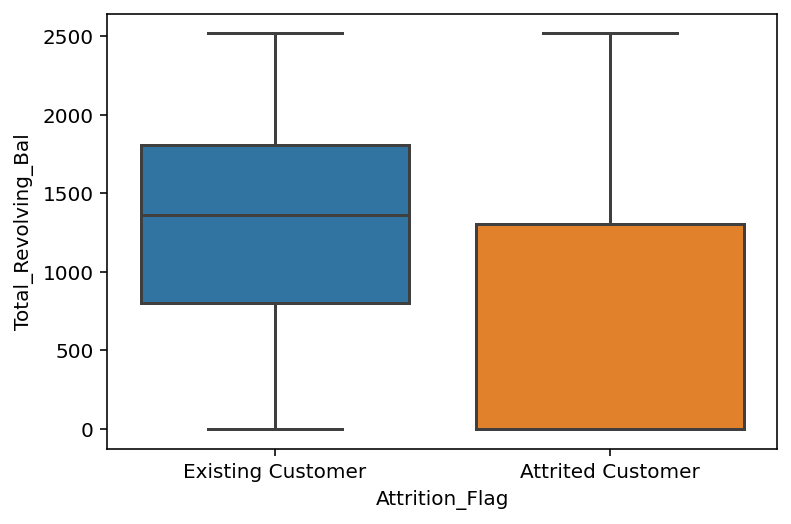

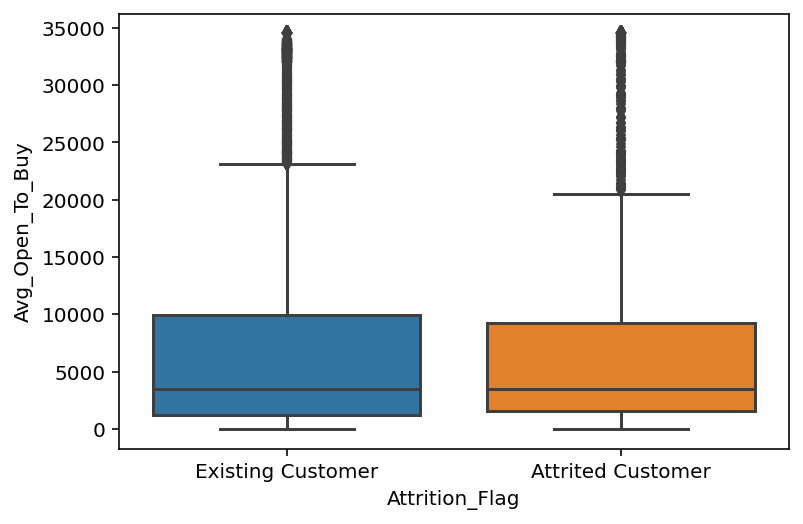

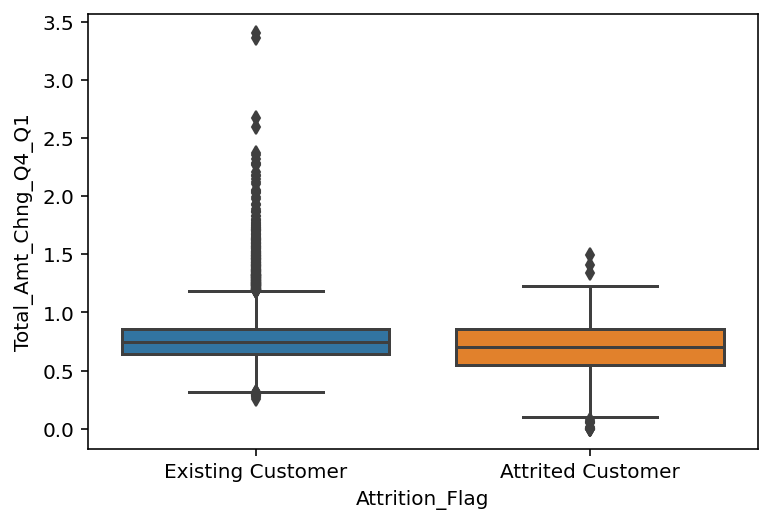

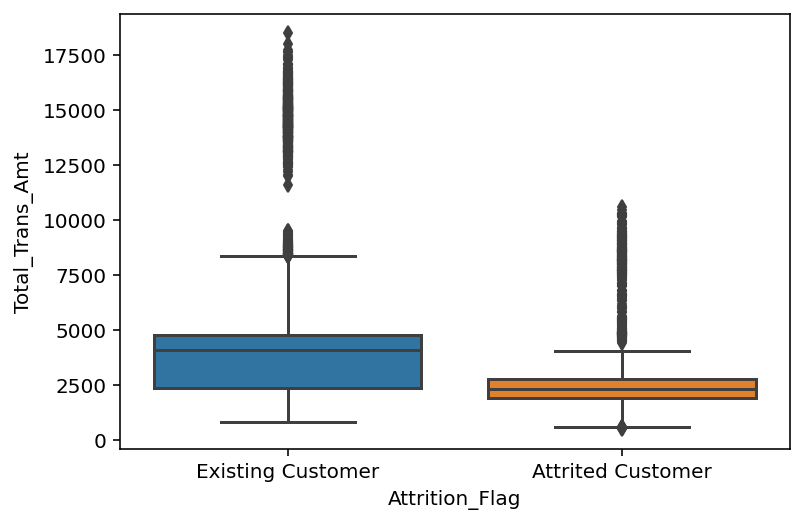

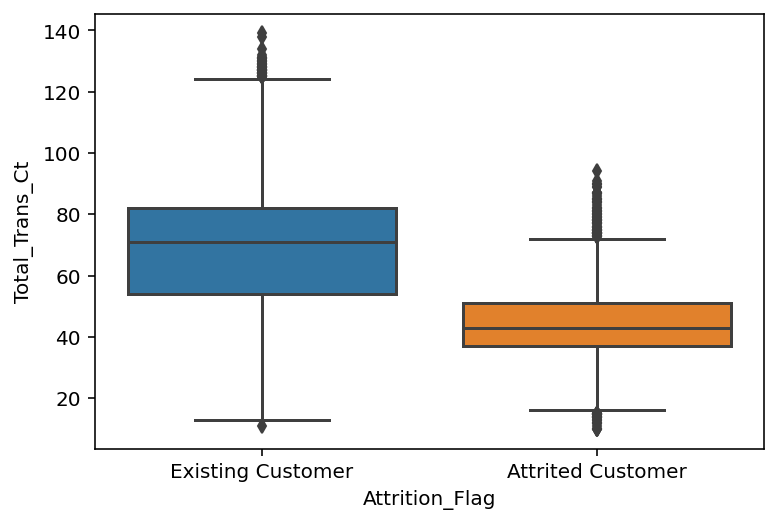

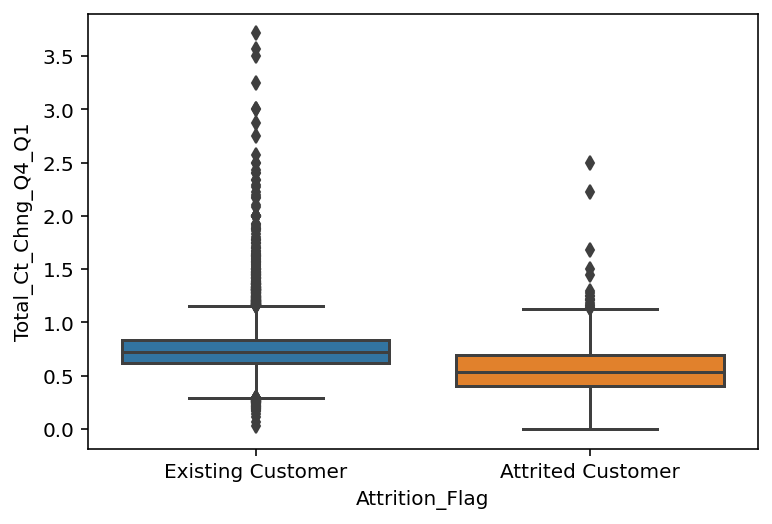

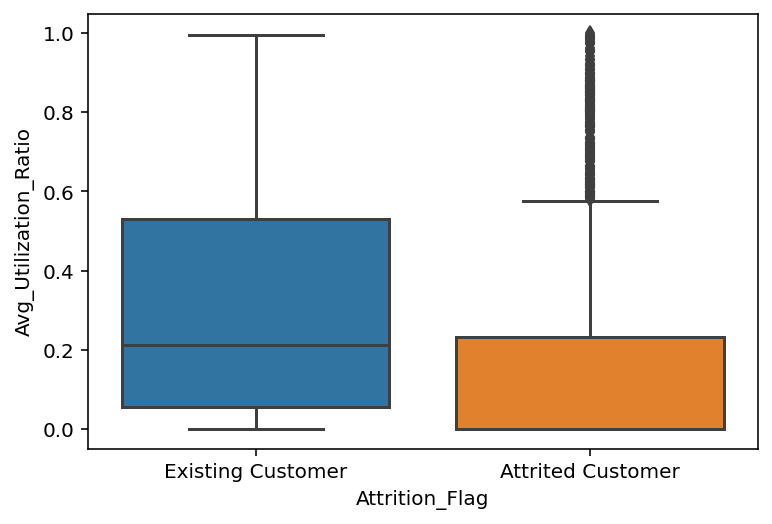

In [13]:
numcollist=['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit',
            'Total_Revolving_Bal',
            'Avg_Open_To_Buy',          
            'Total_Amt_Chng_Q4_Q1',   
            'Total_Trans_Amt',             
            'Total_Trans_Ct',           
            'Total_Ct_Chng_Q4_Q1',       
            'Avg_Utilization_Ratio']
for col in numcollist:
        chart = sns.boxplot(y=col,x="Attrition_Flag", data=df_copy)
        plt.show()

# Most differentiating numerical Variables
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Total_Revolving_Bal
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio

<AxesSubplot:>

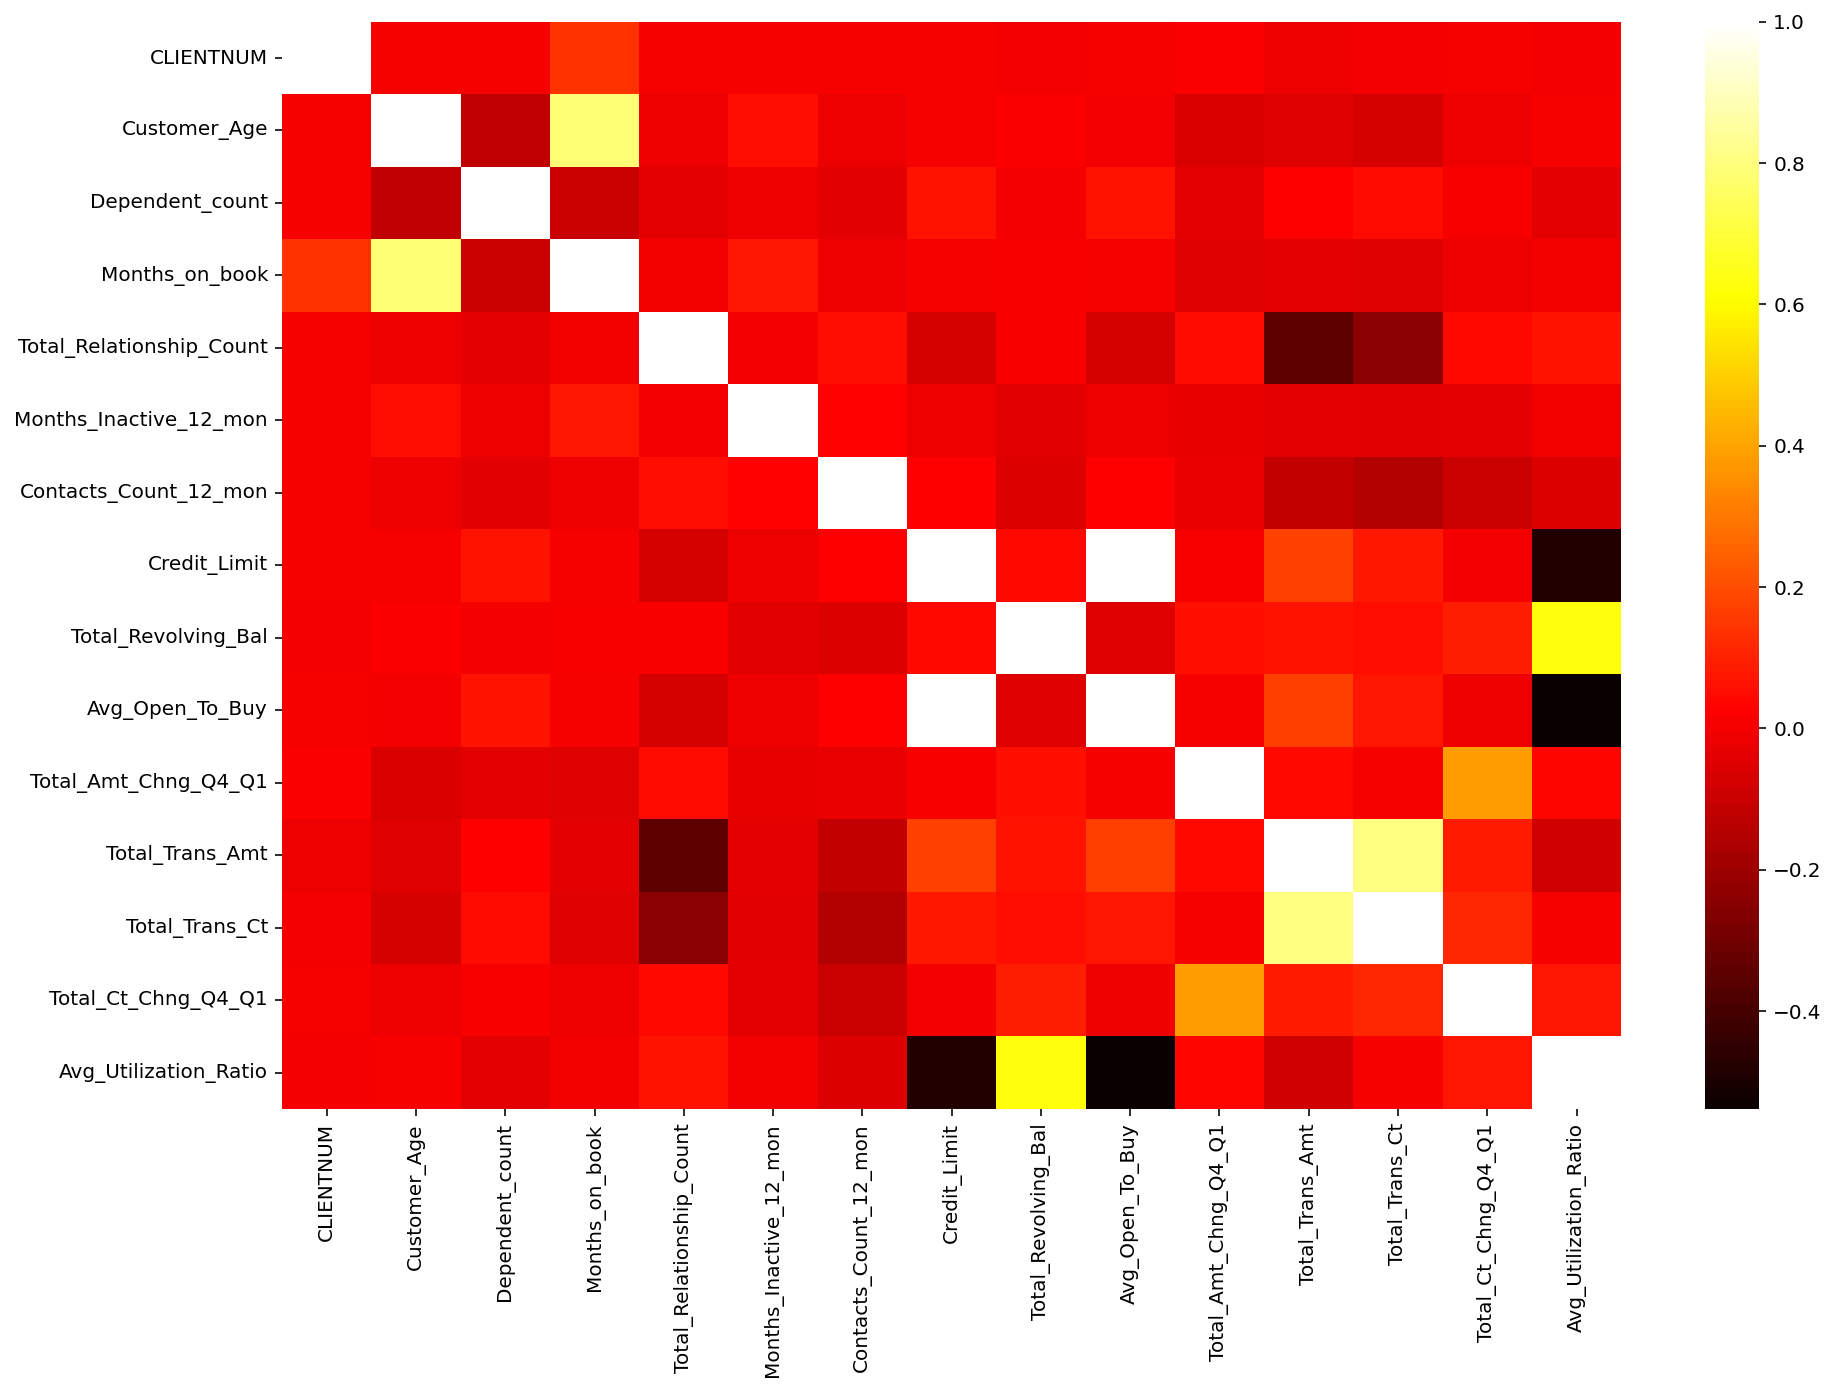

In [28]:
#heatmap of correlation matrix
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_copy.corr(),cmap='hot')


# Collinear Variables:-
       +ve
- cust Age vs MOB
- Rev bal vs Utilisation Ratio
- Tot Amt change Q4/Q1 vs Total count change Q4/Q1
- Tot Tran Amt vs Tot Tran Cnt
- Credit Limit vs Open to buy
       -ve
- Tran Cnt vs Tot relationship count
- Tran Amt vs Tot Relationship count
- Credit limit vs Utilisation
- Avg open to buy Vs utilisation